In [5]:
from fully_random_binary_RB import FullyRandomBinaryRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim
from pecos_selene import qsystem_model_alpha # requires pecos_selene

In [6]:
# select parameters and build experiment

n_qubits = 98
n_meas_per_layer = [0, 8]
seq_lengths = [4, 8, 12] # half of circuit depth
seq_reps = 1 # number of jobs for each sequence length. Default is 1. Increasing allows for interleaving jobs of different sequence lengths
filename = 'exp_fully_random_binary_RB_example.p'

exp = FullyRandomBinaryRB_Experiment(n_qubits, seq_lengths, seq_reps=seq_reps, n_meas_per_layer=n_meas_per_layer, filename=filename)
exp.add_settings()

In [ ]:
# or load an existing experiment from working directory

filename = 'exp_fully_random_binary_RB_example.p'
exp = FullyRandomBinaryRB_Experiment.load(filename)

Having setup our binary RB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [3]:
# setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=1.5e-3,
    p_init=0,
)

In [ ]:
# Or use hardware realistic error model

error_model = qsystem_model_alpha(random_seed=123)

In [4]:
# simulate experiment

shots = 1000
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/9 circuits complete
2/9 circuits complete
3/9 circuits complete
4/9 circuits complete
5/9 circuits complete
6/9 circuits complete
7/9 circuits complete
8/9 circuits complete
9/9 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [7]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

Enter your Nexus email:  karl.mayer@quantinuum.com
Enter your Nexus password:  ········


✅ Successfully logged in as karl.mayer@quantinuum.com.


In [8]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='fully-random-binary_RB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [9]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

Experiment saved! exp_fully_random_binary_RB_example.p


In [11]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<JobStatusEnum.COMPLETED: 'COMPLETED'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 8, 28, 20, 59, 57, 618591, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 8, 28, 20, 56, 47, 749247, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=None, queue_position=None)

In [12]:
# retrieve results

exp.retrieve(execute_job_ref)

Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider 

Experiment saved! exp_fully_random_binary_RB_example.p


### Analyze experimental results

C:\Users\karl.mayer\repos\circuit-benchmarks-guppy\fully_random_binary_RB.py:668: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(decay_fit_func, x_data, y_data)


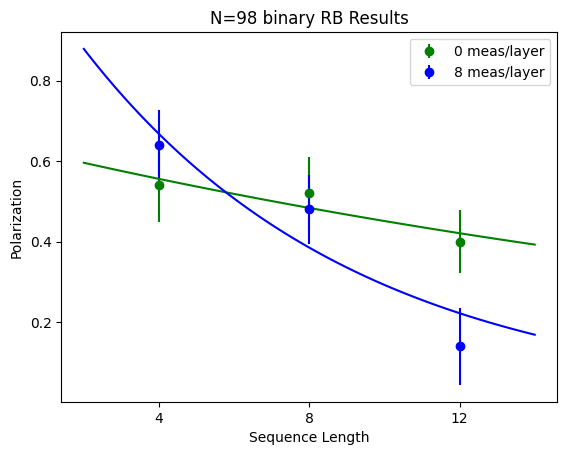

C:\Users\karl.mayer\repos\circuit-benchmarks-guppy\fully_random_binary_RB.py:576: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x_data, y_data)


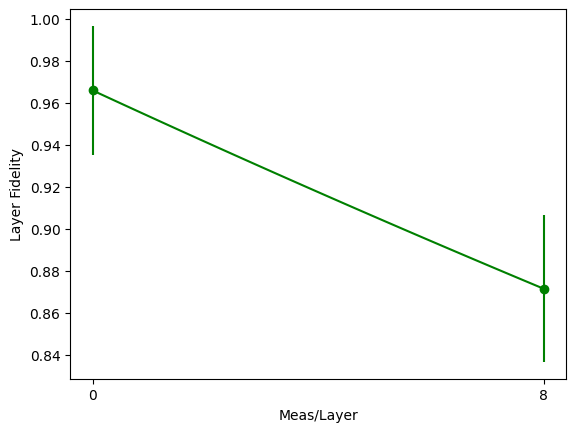

Max depth with success > 2/3
MCMR/layer = 0: 39
MCMR/layer = 8: 15
Effective TQ avg fidelity: 0.99943 +/- 0.00053
Effective MCMR error: 0.0085 +/- 0.00413


In [13]:
exp.analyze_results()

In [ ]:
# save experiment object to working directory

exp.save()